# Task-1 import all module which needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use(['dark_background'])

# Task-2 Load the data into the dataframe

In [2]:
df=load_iris()
data=pd.DataFrame(df.data,columns=df.feature_names)
data[['sepal length (cm)','sepal width (cm)']].head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


# Task-3 Here we have to find out the sum of square error(sse) and visualizing elbow method for better selection of k'th value

Text(0.5, 1.0, 'Elbow Stratergy')

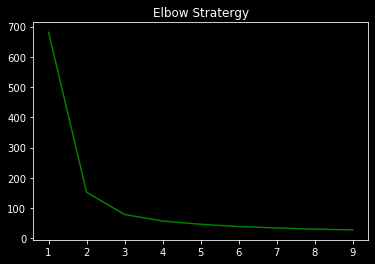

In [3]:
sse=[]
k_rng=range(1,10)
for i in range(1,10):
    cluster=KMeans(n_clusters=i)
    cluster.fit_predict(data)
    sse.append(cluster.inertia_)
    
plt.plot(k_rng,sse,c='g')   
plt.title("Elbow Stratergy",c='w')

# Task-4 Here we have to call the Kmeans and use the fit_predict for model training(N.B-Here we have to chose k=3,because of elbow strategy)

In [4]:
km=KMeans(n_clusters=3)
data['cluster']=km.fit_predict(data)
data.head()
np.round(km.cluster_centers_[:,2])

array([4., 1., 6.])

# Task-5 And here is the visualization

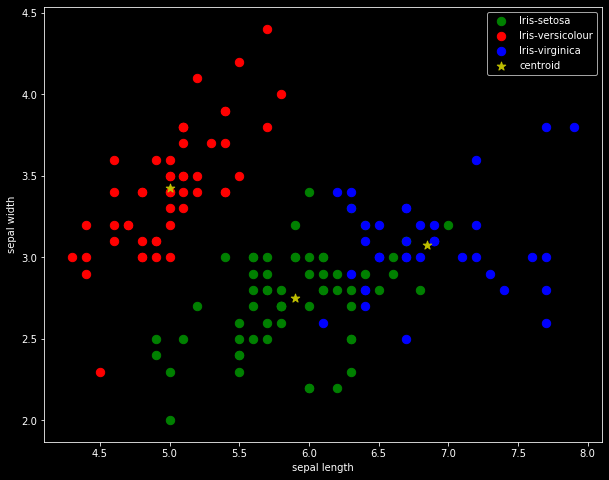

In [5]:
df1=data[data.cluster==0]
df2=data[data.cluster==1]
df3=data[data.cluster==2]

plt.figure(figsize=(10,8))

plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='g',s=70,label = 'Iris-setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],c='r',s=70,label = 'Iris-versicolour')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],c='b',s=70,label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='y',label="centroid",s=80,marker='*')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()